<a href="https://colab.research.google.com/github/RebeccaTsekanovskiy/CSCI4961_labs_projects/blob/main/Getting_Started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'data'

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

FileNotFoundError: [Errno 2] No such file or directory: 'data'

# 3. Load Data

In [98]:
import numpy as np
from matplotlib import pyplot as plt

In [100]:
data = tf.keras.utils.image_dataset_from_directory('data2')

Found 62 files belonging to 2 classes.


In [51]:
data_iterator = data.as_numpy_iterator()

In [52]:
batch = data_iterator.next()

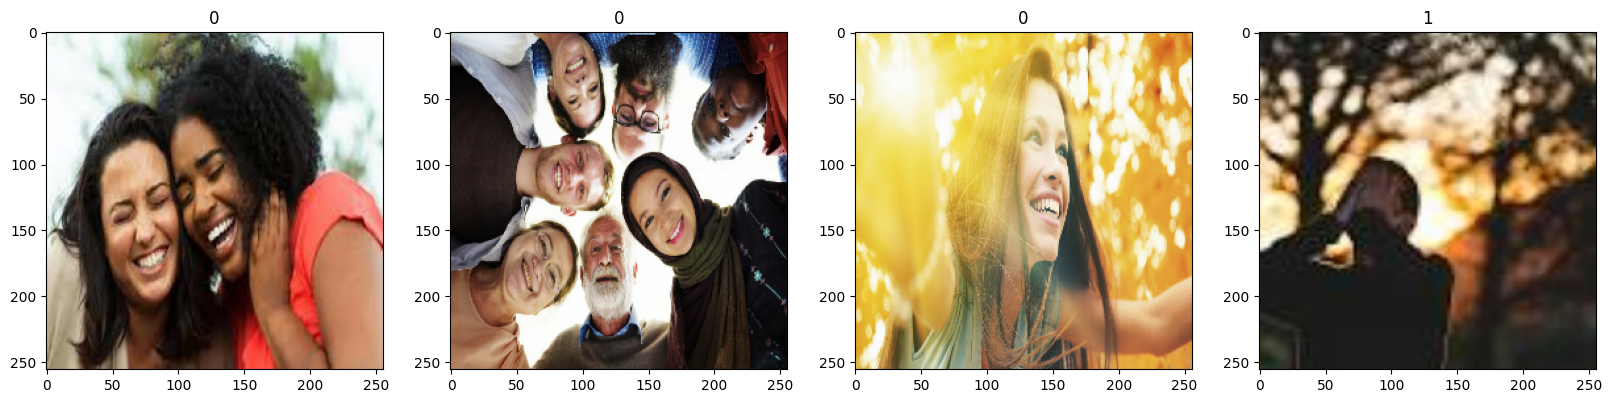

In [53]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [54]:
data = data.map(lambda x,y: (x/255, y))

In [55]:
data.as_numpy_iterator().next()

(array([[[[0.1264706 , 0.16568628, 0.1872549 ],
          [0.11666667, 0.16764706, 0.19901961],
          [0.10392157, 0.15490197, 0.18627451],
          ...,
          [0.21372549, 0.28039217, 0.3509804 ],
          [0.20294118, 0.26960784, 0.33235294],
          [0.21078432, 0.27745098, 0.34019607]],
 
         [[0.11666667, 0.15588236, 0.17745098],
          [0.11372549, 0.16470589, 0.19607843],
          [0.10980392, 0.16078432, 0.19215687],
          ...,
          [0.21862745, 0.28529412, 0.35588235],
          [0.22156863, 0.2882353 , 0.3509804 ],
          [0.21960784, 0.28627452, 0.34901962]],
 
         [[0.13137256, 0.17058824, 0.19215687],
          [0.11372549, 0.16470589, 0.19607843],
          [0.10980392, 0.16078432, 0.19215687],
          ...,
          [0.2127451 , 0.27941176, 0.35      ],
          [0.22058824, 0.28921568, 0.3509804 ],
          [0.22745098, 0.29411766, 0.35686275]],
 
         ...,
 
         [[0.3745098 , 0.3627451 , 0.3647059 ],
          [0.59215

# 5. Split Data

In [56]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [57]:
train_size

7

In [58]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [59]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [61]:
model = Sequential()

In [62]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [67]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

# 7. Train

In [69]:
logdir='logs'

In [70]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [71]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 20s 2s/step - loss: 1.5311 - accuracy: 0.4688 - val_loss: 0.6495 - val_accuracy: 0.6094
Epoch 2/20
7/7 [==============================] - 20s 2s/step - loss: 0.6600 - accuracy: 0.5893 - val_loss: 0.6431 - val_accuracy: 0.6719
Epoch 3/20
7/7 [==============================] - 20s 3s/step - loss: 0.6124 - accuracy: 0.6607 - val_loss: 0.5938 - val_accuracy: 0.5625
Epoch 4/20
7/7 [==============================] - 19s 2s/step - loss: 0.5520 - accuracy: 0.7455 - val_loss: 0.5782 - val_accuracy: 0.7031
Epoch 5/20
7/7 [==============================] - 18s 2s/step - loss: 0.5338 - accuracy: 0.7455 - val_loss: 0.4709 - val_accuracy: 0.7969
Epoch 6/20
7/7 [==============================] - 18s 2s/step - loss: 0.4444 - accuracy: 0.8125 - val_loss: 0.3696 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 19s 2s/step - loss: 0.3978 - accuracy: 0.8125 - val_loss: 0.4596 - val_accuracy: 0.7344
Epoch 8/20
7/7 [==================

# 8. Plot Performance

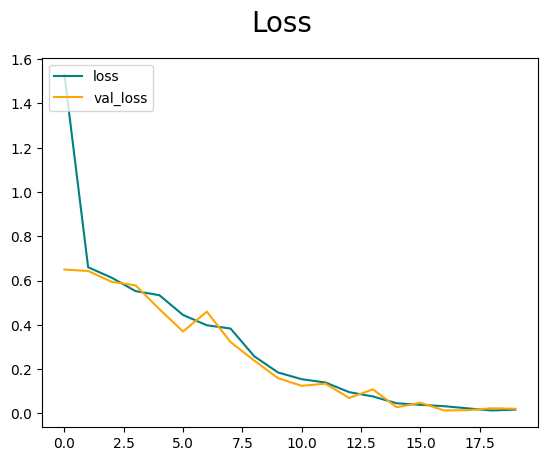

In [72]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

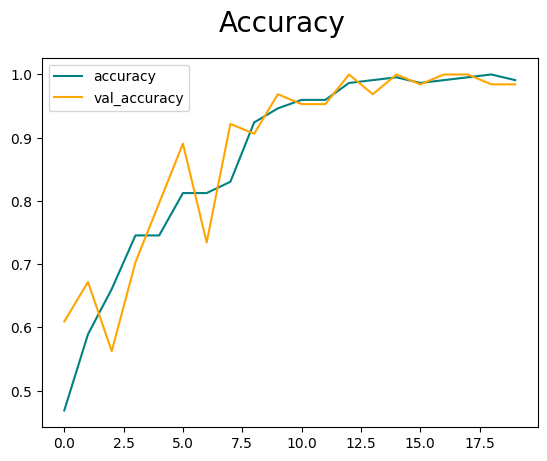

In [73]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [74]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [75]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [76]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 512ms/step


In [77]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [78]:
import cv2

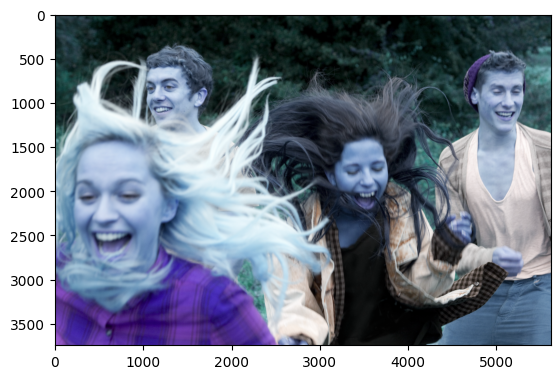

In [79]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

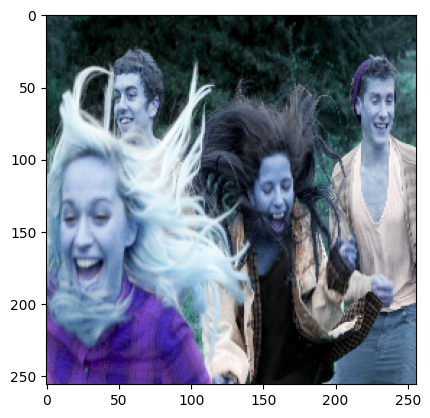

In [80]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [81]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 35ms/step


In [82]:
yhat

array([[0.17938013]], dtype=float32)

In [83]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [84]:
from tensorflow.keras.models import load_model

In [86]:
model.save(os.path.join('models','imageclassifier.keras'))

In [90]:
new_model = load_model('models/imageclassifier.keras')

In [91]:
new_model

In [92]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 110ms/step


array([[0.17938013]], dtype=float32)